# Import libraries/packages

In [5]:
# Import pandas, numpy, seabon, sklearn, pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans

#SpectralClustering

#pd.set_option('max.rows', None)
#pd.set_option('max.columns', None)

%matplotlib inline

In [6]:
from config_and_dependencies.config import * 

## Import data

In [7]:
%store -r my_superficial

In [8]:
my_superficial.head()

,Analysis,Geology,Province,Region,Site,SubSite,Formation,Band,Nodule,Li7,...,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238,class
808,005_AB_1,Superficial,NaN,AB,AB,AB,NaN,AB,AB_1,19.35,...,0.01,0.00,0.01,0.0,0.01,0.00,0.56,0.05,0.210000,AB
809,006_AB_1,Superficial,NaN,AB,AB,AB,NaN,AB,AB_1,2.61,...,0.02,0.00,0.02,0.0,0.00,0.00,0.24,0.06,0.510000,AB
810,007_AB_1,Superficial,NaN,AB,AB,AB,NaN,AB,AB_1,2.29,...,0.02,0.00,0.00,0.0,0.02,0.01,0.48,0.05,0.242569,AB
811,008_AB_2,Superficial,NaN,AB,AB,AB,NaN,AB,AB_2,6.86,...,0.07,0.01,0.04,0.0,0.00,0.01,3.11,0.06,0.030000,AB
812,009_AB_2,Superficial,NaN,AB,AB,AB,NaN,AB,AB_2,8.45,...,0.05,0.00,0.04,0.0,0.01,0.00,3.04,0.06,0.060000,AB


In [9]:
my_superficial['Site'].unique()

array(['AB', 'LV', 'BR', 'KY', 'BF', 'ST', 'SH', 'CF', 'BG', 'AC', 'CR',
       'GH', 'PX', 'WF'], dtype=object)

In [10]:
X = my_superficial.loc[my_superficial['Region'].isin(['WA_black','WA_grey'])]

In [11]:
X.head()

,Analysis,Geology,Province,Region,Site,SubSite,Formation,Band,Nodule,Li7,...,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238,class
1078,189_AC_1,Superficial,NaN,WA_grey,AC,AC,NaN,AC,AC_1,5.47,...,0.35,0.07,0.23,0.023009,0.17,0.021065,0.87,0.28,0.55,WA_grey
1079,190_AC_1,Superficial,NaN,WA_grey,AC,AC,NaN,AC,AC_1,4.87,...,0.10,0.04,0.11,0.020000,0.03,0.010000,0.75,0.11,0.17,WA_grey
1080,191_AC_1,Superficial,NaN,WA_grey,AC,AC,NaN,AC,AC_1,2.66,...,0.12,0.02,0.07,0.020000,0.02,0.030000,0.55,0.12,0.19,WA_grey
1081,192_AC_2,Superficial,NaN,WA_black,AC,AC,NaN,AC,AC_2,1.72,...,0.11,0.01,0.04,0.010000,0.02,0.010000,0.49,0.05,0.28,WA_black
1082,193_AC_2,Superficial,NaN,WA_black,AC,AC,NaN,AC,AC_2,1.92,...,0.10,0.02,0.08,0.020000,0.04,0.020000,0.33,0.08,0.31,WA_black


In [12]:
X_CR = X.iloc[:,9:-1]

In [13]:
X_CR.head()

,Li7,Be9,B11,Mg24,Al27,Si28,P31,S33,K39,Ca42,...,Ho165,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238
1078,5.47,0.28,82.67,30.52,1127.73,464217.25,100.84,882.65,704.45,609.64,...,0.13,0.35,0.07,0.23,0.023009,0.17,0.021065,0.87,0.28,0.55
1079,4.87,0.18,44.27,9.18,292.65,465474.58,117.19,877.98,246.35,341.43,...,0.09,0.10,0.04,0.11,0.020000,0.03,0.010000,0.75,0.11,0.17
1080,2.66,0.29,74.72,13.19,315.12,465305.69,118.52,935.80,280.04,405.85,...,0.07,0.12,0.02,0.07,0.020000,0.02,0.030000,0.55,0.12,0.19
1081,1.72,0.27,84.32,12.82,313.51,465351.08,142.16,981.65,308.10,142.38,...,0.03,0.11,0.01,0.04,0.010000,0.02,0.010000,0.49,0.05,0.28
1082,1.92,0.21,91.56,13.90,336.84,465425.53,152.84,990.72,296.18,117.47,...,0.06,0.10,0.02,0.08,0.020000,0.04,0.020000,0.33,0.08,0.31


## Select only best feats (derived from RFE from PhD)

In [14]:
best_feats = ['Zr90', 'Ba137', 'Sr88', 'Ge72', 'Cr52', 'S33', 'U238', 'Al27', 'B11', 'Mg24', 'Nd146', 'Sc45', 'K39', 'Pr141', 'Li7']

In [90]:
print(len(best_feats))

15


In [15]:
X_CR = X_CR[X_CR.columns.intersection(best_feats)]

In [16]:
X_CR.head()

,Li7,B11,Mg24,Al27,S33,K39,Sc45,Cr52,Ge72,Sr88,Zr90,Ba137,Pr141,Nd146,U238
1078,5.47,82.67,30.52,1127.73,882.65,704.45,1.06,7.45,1.13,4.34,0.79,2.21,0.55,1.81,0.55
1079,4.87,44.27,9.18,292.65,877.98,246.35,0.64,6.98,0.75,3.12,0.68,1.23,0.38,1.34,0.17
1080,2.66,74.72,13.19,315.12,935.80,280.04,0.48,7.35,0.86,4.14,1.45,2.29,0.50,1.82,0.19
1081,1.72,84.32,12.82,313.51,981.65,308.10,0.40,7.11,0.97,4.30,0.78,1.00,0.29,1.16,0.28
1082,1.92,91.56,13.90,336.84,990.72,296.18,0.54,7.03,1.26,4.42,0.94,1.26,0.33,1.24,0.31


<AxesSubplot:xlabel='B11', ylabel='Al27'>

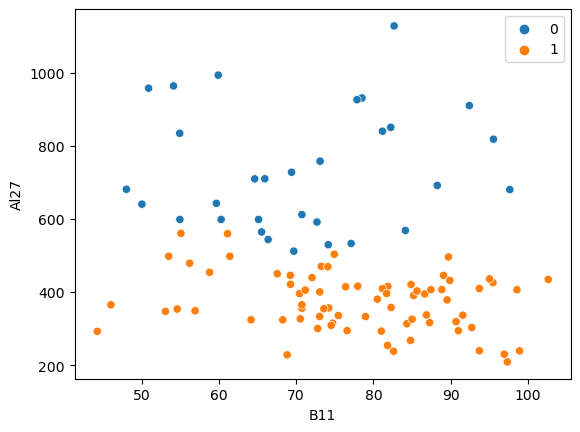

In [188]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

model = SpectralClustering(n_clusters=2, 
                           affinity='nearest_neighbors', 
                           assign_labels='kmeans')
labels = model.fit_predict(X_CR)
#plt.scatter(X_CR.iloc[:, 1], X_CR.iloc[:, 2])#, c=labels, s=50, cmap='viridis');
sns.scatterplot(x=X_CR.iloc[:, 1], y=X_CR.iloc[:, 3], hue=labels)

##### import plotly.express as px

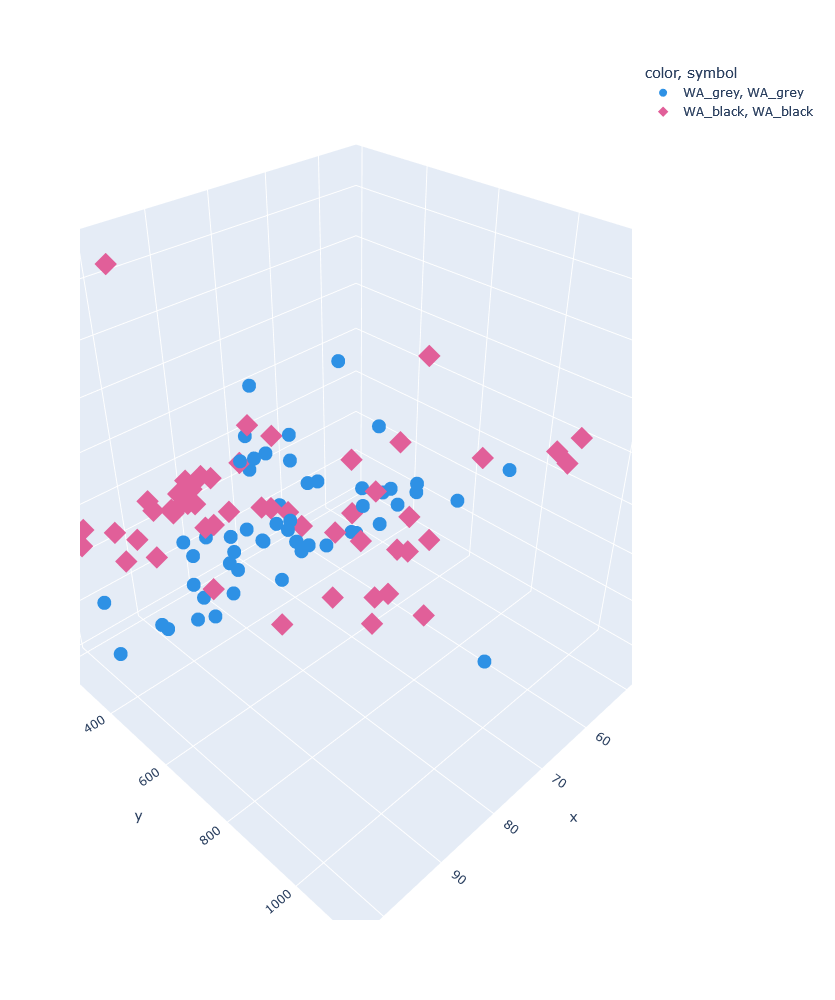

In [201]:
fig2 = px.scatter_3d(X_CR, 
                     x=X_CR.iloc[:,1], 
                     y=X_CR.iloc[:,3], 
                     z=X_CR.iloc[:,9],
                     color=X['Region'], 
                     height=1000,
                     color_discrete_sequence=px.colors.qualitative.Dark24,
                     symbol = X['Region'])
#fig.update_traces(marker_size = 5)
#fig2.update_layout(title="5 Features Representation")
fig2.show()

In [142]:
from sklearn.cluster import KMeans, SpectralClustering

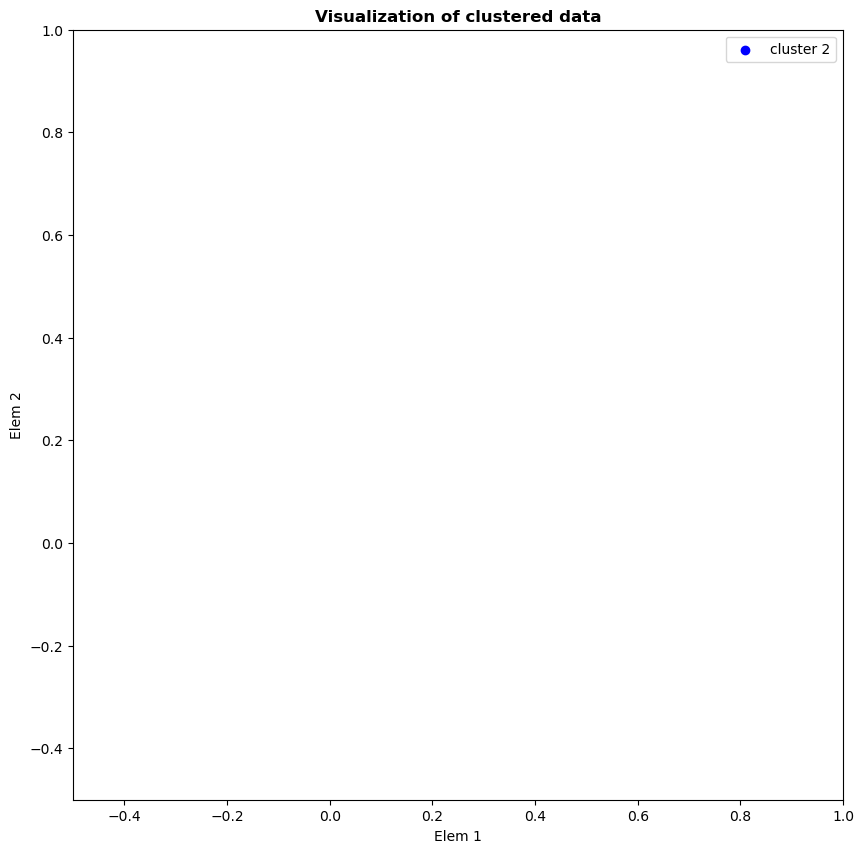

In [203]:
km = KMeans(n_clusters=2, max_iter=300)
km.fit(X_CR)
centroids = km.cluster_centers_
y_kmeans = km.predict(X_CR)
km.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))

#plt.scatter(X_CR.iloc[:,1], X_CR.iloc[:,2], c=y_kmeans, cmap='viridis', label=X['Region'])
plt.scatter(X_CR.iloc[:,2], X_CR.iloc[:,3], c='blue', label='cluster 2')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='centroid')

plt.legend()
plt.xlim([-0.5, 1])
plt.ylim([-0.5, 1])
plt.xlabel('Elem 1')
plt.ylabel('Elem 2')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

In [204]:
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_CR)
y_kmeans = kmeans.predict(X_CR)



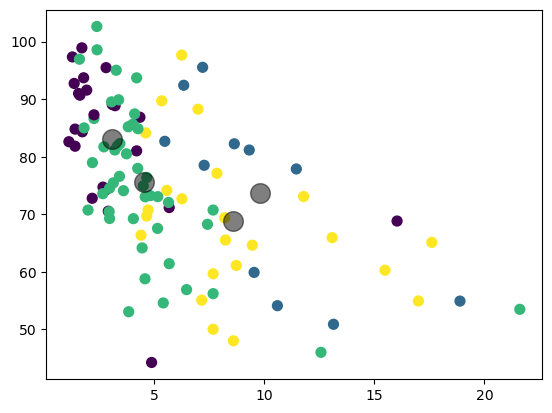

In [205]:
plt.scatter(X_CR.iloc[:, 0], X_CR.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## TSNE

In [22]:
my_scaler_test = StandardScaler()

In [23]:
element_data_test_scaled = my_scaler_test.fit_transform(X_CR)

In [24]:
my_tsne_test = TSNE(n_components=3, perplexity=25, learning_rate=200, n_iter=2000, verbose=3).fit_transform(element_data_test_scaled)

C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 105 samples in 0.000s...
[t-SNE] Computed neighbors for 105 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 105 / 105
[t-SNE] Mean sigma: 1.824057
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 89.3698578, gradient norm = 0.1769964 (50 iterations in 0.048s)
[t-SNE] Iteration 100: error = 97.8119354, gradient norm = 0.1611781 (50 iterations in 0.041s)
[t-SNE] Iteration 150: error = 109.3946991, gradient norm = 0.1664238 (50 iterations in 0.038s)
[t-SNE] Iteration 200: error = 117.1191788, gradient norm = 0.1463844 (50 iterations in 0.044s)
[t-SNE] Iteration 250: error = 130.5519409, gradient norm = 0.1556297 (50 iterations in 0.042s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 130.551941
[t-SNE] Iteration 300: error = 3.2774279, gradient norm = 0.0003567 (50 iterations in 0.041s)
[t-SNE] Iteration 350: error = 2.8149781, gradient norm = 0.00014

In [25]:
tsne_df_test = pd.DataFrame(data = my_tsne_test, columns = ['tsne1', 'tsne2', 'tsne3'])

### add group back in (nodule)

In [75]:
Labelcol = X['Region']

In [76]:
Labelcol.head()

1078     WA_grey
1079     WA_grey
1080     WA_grey
1081    WA_black
1082    WA_black
Name: Region, dtype: object

In [77]:
tsne3d_df_LabelCol_comb = pd.concat([Labelcol.reset_index(drop=True), tsne_df_test.reset_index(drop=True)], axis=1)

In [78]:
%store tsne3d_df_LabelCol_comb

Stored 'tsne3d_df_LabelCol_comb' (DataFrame)


In [79]:
tsne3d_df_LabelCol_comb.head()

,Region,tsne1,tsne2,tsne3
0,WA_grey,137.536362,316.290863,95.540543
1,WA_grey,-56.262630,-151.968231,-12.820321
2,WA_grey,-101.830833,58.144329,-68.136841
3,WA_black,302.588867,-156.936996,10.606688
4,WA_black,-131.267654,169.731583,-73.162796


## TSNE 3D Visualisation

In [80]:
tsne3d_labels = Labelcol

In [81]:
filepath = 'figures/Butcher2005_Tom_tSNE_3dPlot_Issue_bestfeats.html'

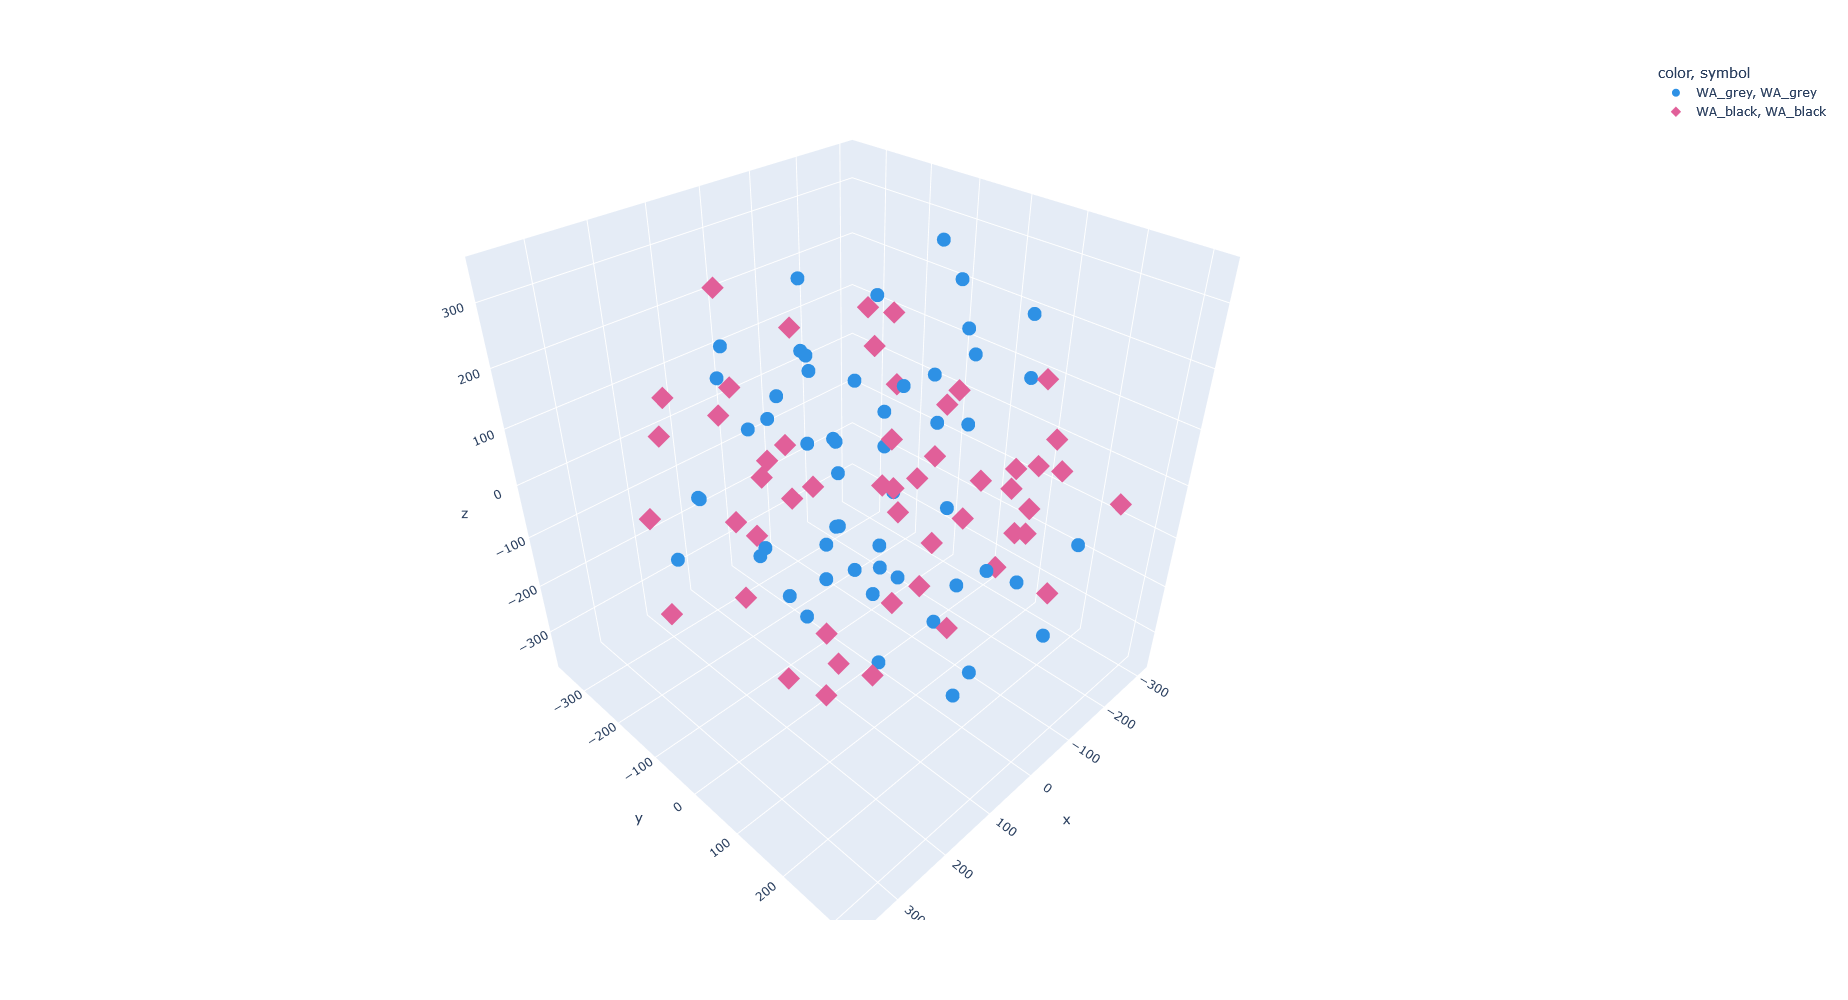

In [82]:
fig2 = px.scatter_3d(tsne3d_df_LabelCol_comb, 
                     x=tsne3d_df_LabelCol_comb.iloc[:,1], 
                     y=tsne3d_df_LabelCol_comb.iloc[:,2], 
                     z=tsne3d_df_LabelCol_comb.iloc[:,3], 
                     color=tsne3d_labels, height=1000,
                     color_discrete_sequence=px.colors.qualitative.Dark24,
                     symbol = tsne3d_labels)
fig.update_traces(marker_size = 5)

fig2.show()

#if save_plots == True:
#    fig.write_html(filepath)

In [209]:
from scipy.stats import mode

#from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(X_CR)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(X[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)



C:\Users\tom\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

# PCA

In [34]:
df = X_CR

In [35]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [91]:
scaled_data = scaler.transform(df)

In [107]:
pca = PCA(n_components=3)

In [108]:
pca.fit(scaled_data)

PCA(n_components=3)

In [109]:
x_pca = pca.transform(scaled_data)

In [110]:
scaled_data.shape

(105, 15)

In [111]:
x_pca.shape

(105, 3)

In [112]:
LabelCol = pd.DataFrame(data=X['Region'])

In [113]:
LabelCol.head()

,Region
1078,WA_grey
1079,WA_grey
1080,WA_grey
1081,WA_black
1082,WA_black


In [114]:
PCA_DF = pd.DataFrame(data=x_pca)

In [115]:
#print(PCA_DF)

In [116]:
#IssueCol = coins['issue or phase']

In [117]:
pca3d_df_NoduleCol_comb = pd.concat([LabelCol.reset_index(drop=True), PCA_DF], axis=1)

In [118]:
pca3d_df_NoduleCol_comb.head()

,Region,0,1,2
0,WA_grey,3.698541,0.605268,3.741512
1,WA_grey,-1.793775,-0.777731,-1.523145
2,WA_grey,-1.130880,-0.644025,0.321757
3,WA_black,-2.103071,0.452253,0.996940
4,WA_black,-1.798485,0.289739,1.435049


In [119]:
#print(pca3d_df_NoduleCol_comb)

In [120]:
pca3d_df_NoduleCol_comb.columns = ['Nodule', 'PC1', 'PC2', 'PC3']

## 3D PCA Visualisation

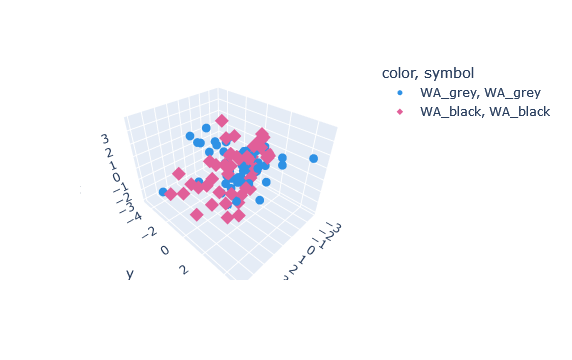

In [121]:
fig = px.scatter_3d(pca3d_df_NoduleCol_comb, 
                    x=pca3d_df_NoduleCol_comb.iloc[:,1], 
                    y=pca3d_df_NoduleCol_comb.iloc[:,2], 
                    z=pca3d_df_NoduleCol_comb.iloc[:,3], 
                    color=pca3d_df_NoduleCol_comb.iloc[:,0],
                    color_discrete_sequence=px.colors.qualitative.Dark24,
                    symbol = pca3d_df_NoduleCol_comb.iloc[:,0])
fig.update_traces(marker_size = 5)

fig.show()

#if save_plots == True:
#    fig.write_html(filepath) 

2D PCA Visualisation

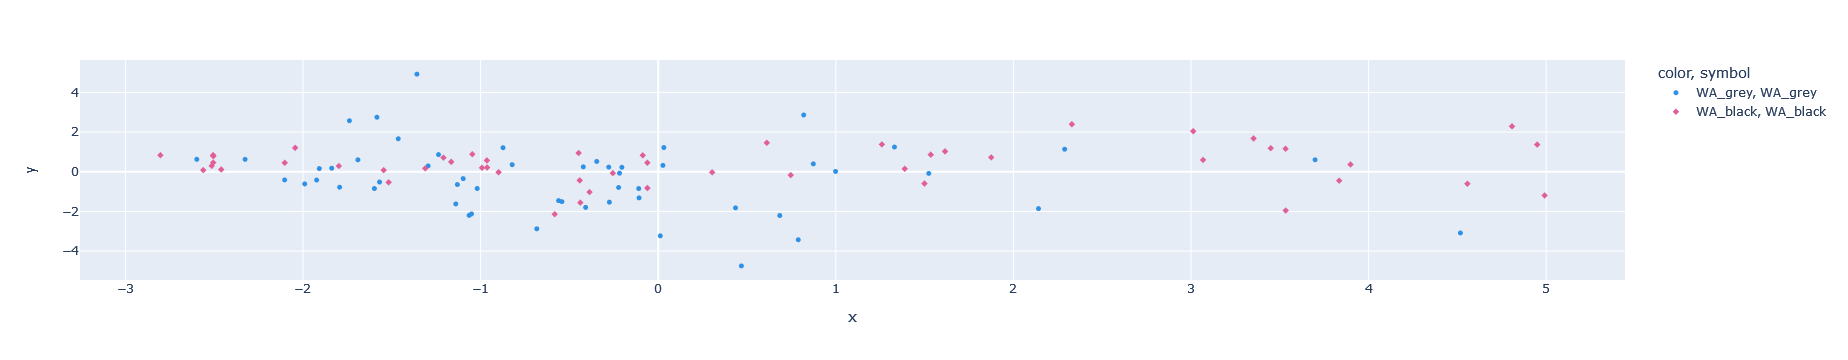

In [89]:
fig = px.scatter(pca3d_df_NoduleCol_comb, 
                    x=pca3d_df_NoduleCol_comb.iloc[:,1], 
                    y=pca3d_df_NoduleCol_comb.iloc[:,2], 
                    #z=pca3d_df_NoduleCol_comb.iloc[:,3], 
                    color=pca3d_df_NoduleCol_comb.iloc[:,0],
                    color_discrete_sequence=px.colors.qualitative.Dark24,
                    symbol = pca3d_df_NoduleCol_comb.iloc[:,0],)
fig.update_traces(marker_size = 5)

fig.show()